# ASSIGNMENT SOLUTION(PS)

### 1. Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

## 2. Data Preprocessing:

### Loading the dataset and inspecting the data.

In [2]:
df = pd.read_csv("housing (1).csv", header=None, names=column_names)
# Display the first few rows of the dataframe to ensure the column names are correctly assigned
print("First few rows of the dataframe with assigned column names:")
print(df.head())
df.info()

First few rows of the dataframe with assigned column names:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     

### Identifying Missing Values

In [3]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### No Missing Values Found

##  Checking for Normal Distribution

In [4]:
import scipy.stats as stats

# Function to perform Anderson-Darling Test
def anderson_darling_test(data, column):
    result = stats.anderson(data[column], dist='norm')
    print(f'Anderson-Darling Test for {column}:')
    print(f'Statistic: {result.statistic}')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'At {sl}% significance level, the data looks normal (statistic {result.statistic} < critical value {cv}).')
        else:
            print(f'At {sl}% significance level, the data does not look normal (statistic {result.statistic} >= critical value {cv}).')
    print()

# List of numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Perform the Anderson-Darling test for each numerical column
for column in numerical_cols:
    anderson_darling_test(df, column)


Anderson-Darling Test for CRIM:
Statistic: 86.76289903052646
At 15.0% significance level, the data does not look normal (statistic 86.76289903052646 >= critical value 0.572).
At 10.0% significance level, the data does not look normal (statistic 86.76289903052646 >= critical value 0.651).
At 5.0% significance level, the data does not look normal (statistic 86.76289903052646 >= critical value 0.781).
At 2.5% significance level, the data does not look normal (statistic 86.76289903052646 >= critical value 0.911).
At 1.0% significance level, the data does not look normal (statistic 86.76289903052646 >= critical value 1.084).

Anderson-Darling Test for ZN:
Statistic: 98.1823442217052
At 15.0% significance level, the data does not look normal (statistic 98.1823442217052 >= critical value 0.572).
At 10.0% significance level, the data does not look normal (statistic 98.1823442217052 >= critical value 0.651).
At 5.0% significance level, the data does not look normal (statistic 98.1823442217052 >

### Anderson-Darling Test Overview

The Anderson-Darling test assesses whether a dataset conforms to a specific distribution, such as the normal distribution. It refines the Kolmogorov-Smirnov test by offering enhanced sensitivity in evaluating how well the data fits the proposed distribution.

**Objective:** To evaluate the null hypothesis that the sample originates from a particular distribution, like the normal distribution.

**Test Statistic:** The test computes a statistic that quantifies the difference between the sample's empirical distribution and the cumulative distribution function (CDF) of the proposed distribution.

### Since the Dataset is not Normally Distributed, therefore we should use IQR instead of Z-score and DBSCAN for outlier detection

## Detection of Outliers

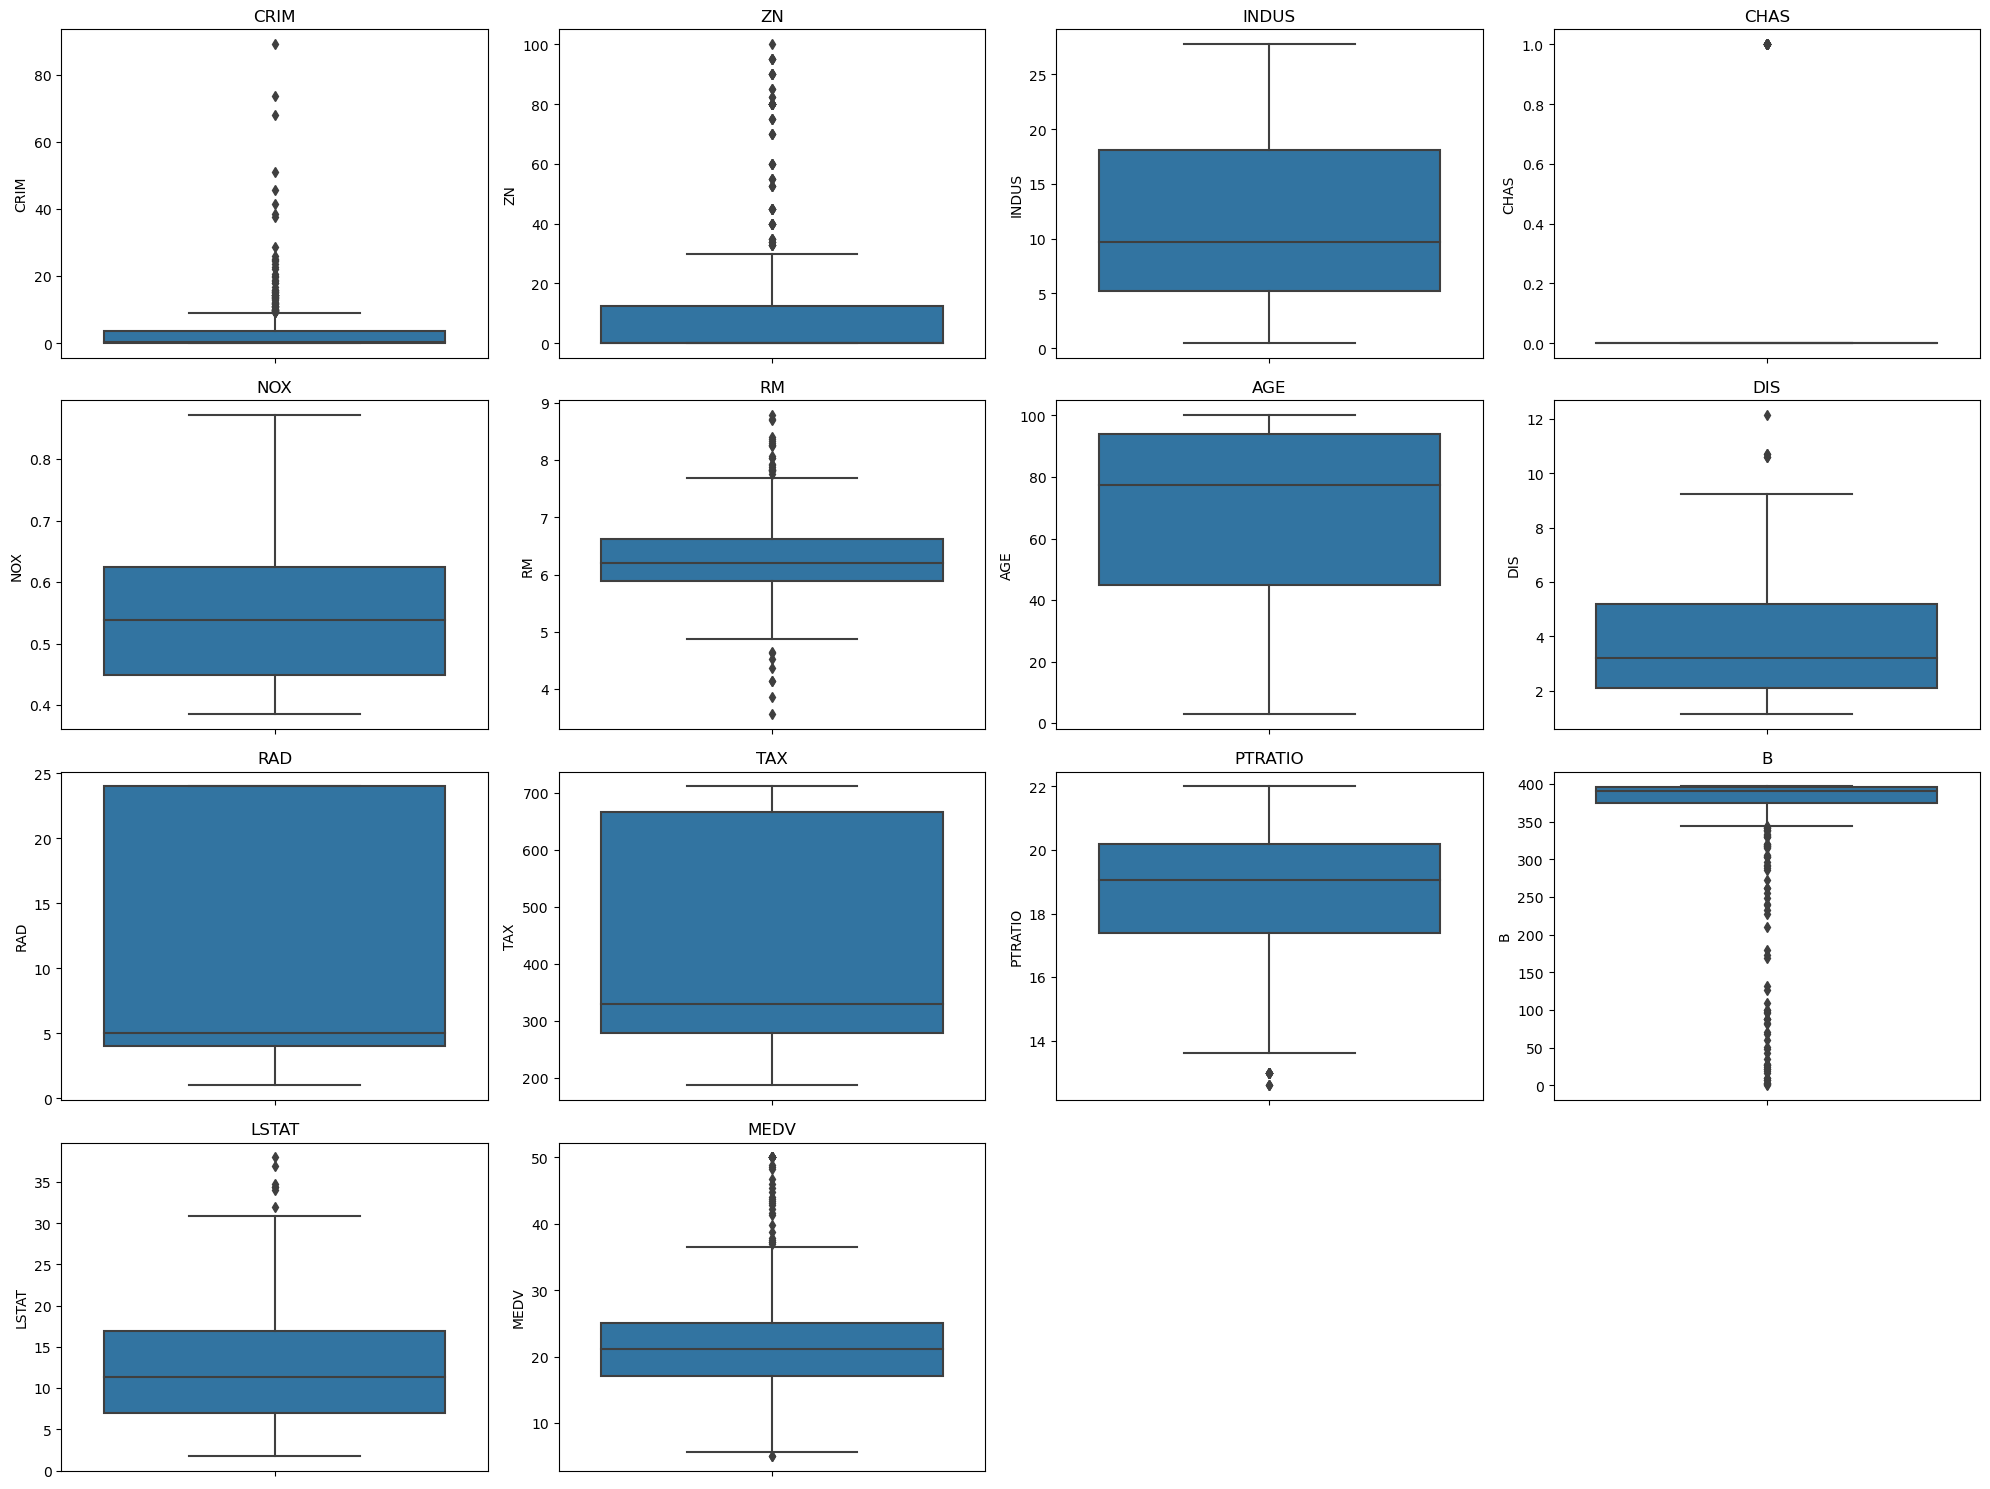

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
df
# Assuming your DataFrame is named df
plt.figure(figsize=(20, 15))
for i, column in enumerate(df, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [6]:
# Identify outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_outliers = df[~((df< (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers:")
print(data_outliers)

Outliers:
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2    

### Treating Outliers(Replacing with median)

In [7]:
import pandas as pd

# Assuming df is your DataFrame

# Copy DataFrame to avoid modifying the original data
data_no_outliers = df.copy()

# Replace outliers with the median for each column
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Only process numeric columns
        # Calculate IQR for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Median for the column
        median_col = df[col].median()
        
        # Create outlier mask
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        
        # Replace outliers with the median value
        data_no_outliers.loc[outlier_mask, col] = median_col

print("\nData without outliers (replaced with median):")
print(data_no_outliers)



Data without outliers (replaced with median):
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1   

### DESCRIPTIVE STATISTICS OF EACH VARIABLE

Descriptive statistics:
             CRIM          ZN       INDUS   CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.0  506.000000  506.000000   
mean     1.075493    2.763834   11.136779    0.0    0.554695    6.231747   
std      2.009455    7.357024    6.860353    0.0    0.115878    0.517519   
min      0.006320    0.000000    0.460000    0.0    0.385000    4.880000   
25%      0.082045    0.000000    5.190000    0.0    0.449000    5.899750   
50%      0.255190    0.000000    9.690000    0.0    0.538000    6.208500   
75%      0.635910    0.000000   18.100000    0.0    0.624000    6.515250   
max      8.982960   30.000000   27.740000    0.0    0.871000    7.691000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.718598    9.549407  408.237154   18.637253  389.121798   
std     28.148861    1.980432    8.707259  168.5

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


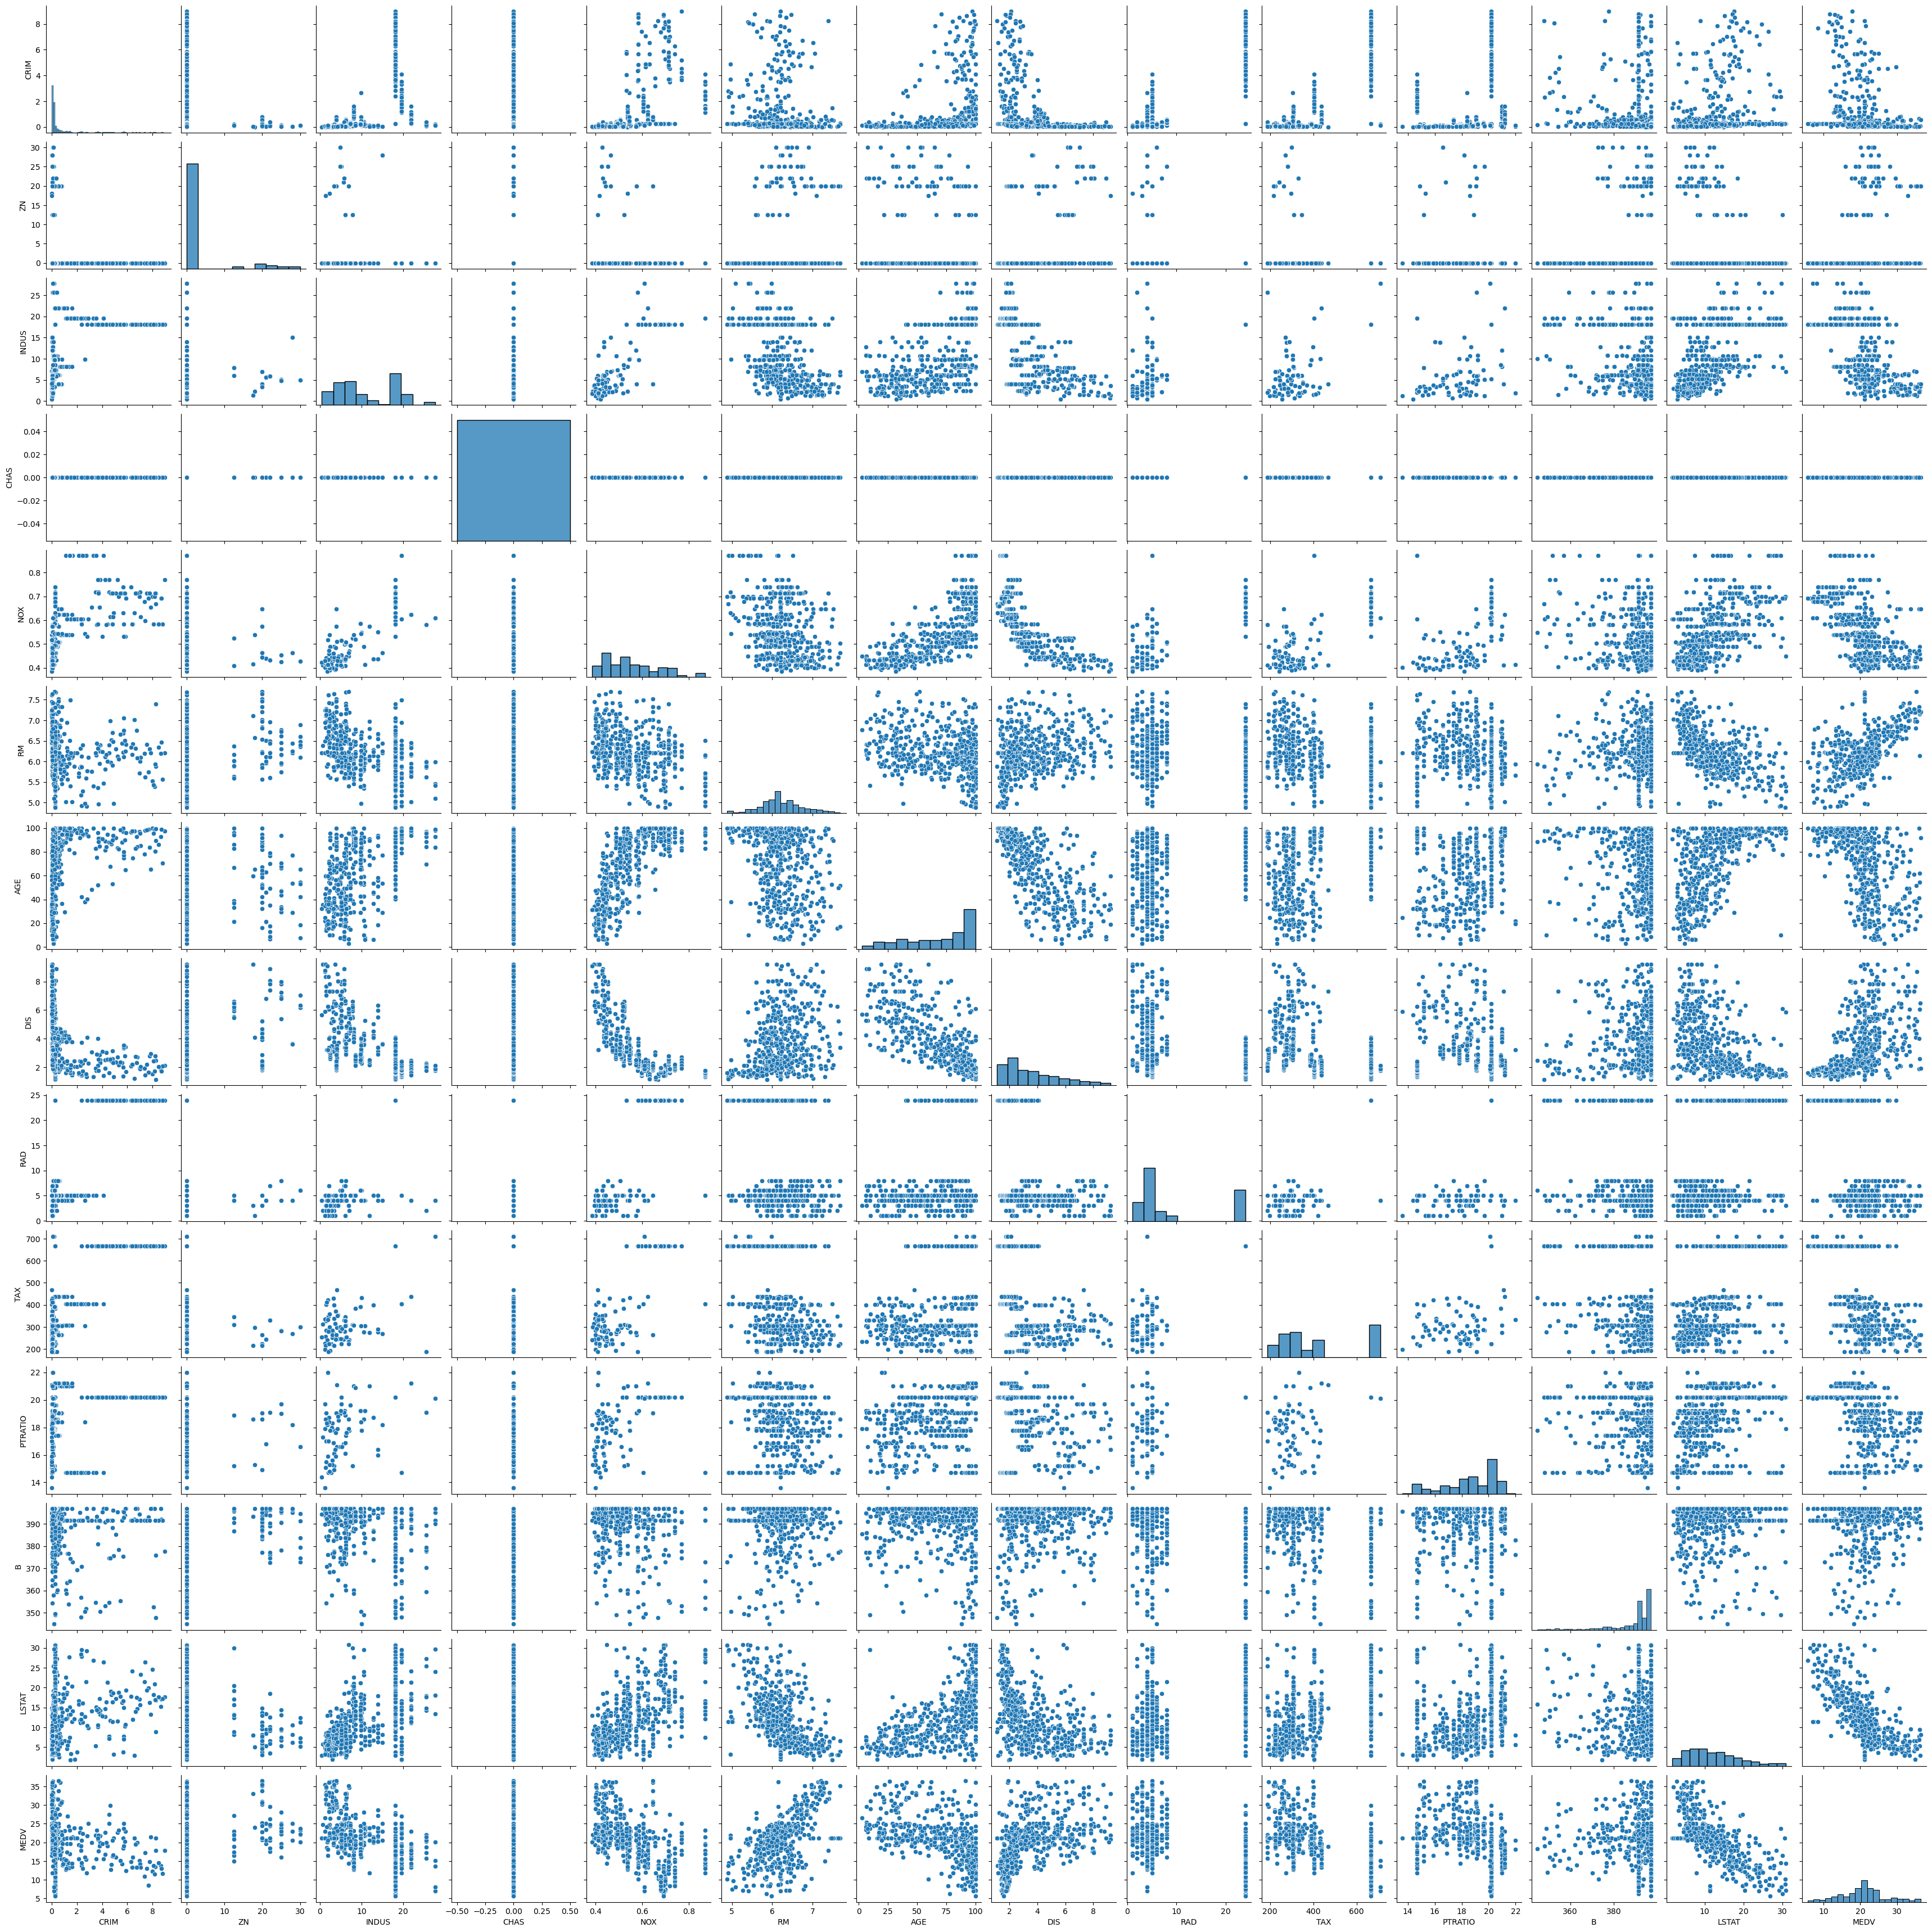

In [8]:
# Descriptive statistics
print("Descriptive statistics:")
print(data_no_outliers.describe())

# Pairplot to visualize relationships
sns.pairplot(data_no_outliers)
plt.show()

#### Observations from the descriptive statistics of  dataset:

1. **CRIM**: High variability with a mean of 1.08 and a maximum of 8.98, indicating a wide range of crime rates.
2. **ZN**: Most values are zero, with a mean of 2.76 and a maximum of 30.00, showing limited zoning changes.
3. **INDUS**: A broad range of industrial activity, with a mean of 11.14 and a maximum of 27.74.
4. **NOX**: Nitric oxide concentrations range from 0.385 to 0.871, with a mean of 0.55.
5. **RM**: Average number of rooms is 6.23, with values ranging from 4.88 to 7.69, indicating relatively spacious homes.
6. **AGE**: Homes are on average quite old, with a mean age of 68.57 years.
7. **DIS**: Average distance to employment centers is 3.72 miles, varying from 1.13 to 9.22 miles.
8. **TAX**: Property tax rates are high on average (mean 408.24), with a wide range from 187 to 711.
9. **PTRATIO**: Pupil-teacher ratio is higher on average (mean 18.64), indicating varying school sizes.
10. **B**: The `B` statistic, related to Black residents' proportion, shows a mean value of 389.12.
11. **LSTAT**: Percentage of lower-status population has a mean of 12.33%, ranging from 1.73% to 30.81%.
12. **MEDV**: Median value of homes averages 20.76, with a range from 5.60 to 36.50, indicating diverse home prices.

These observations reflect significant variability in crime rates, housing characteristics, and socio-economic factors across the dataset.

#### Pairplot Analysis

**There is a bent curve in the scatter-plots of:**
NOX AND AGE<br>
NOX AND DIS<br>
RM AND LSTAT<br>
**There is a linear curve (positive correlation) in the scatter-plots of:**<br>
RM AND MEDV <br>
**There is a linear curve (negative correlation) in the scatter-plots of:** <br>
MEDV AND LSTAT<br>
AGE AND DIS<br>
LSTAT AND RM<br>


Heatmap for correlation between continuous variables:


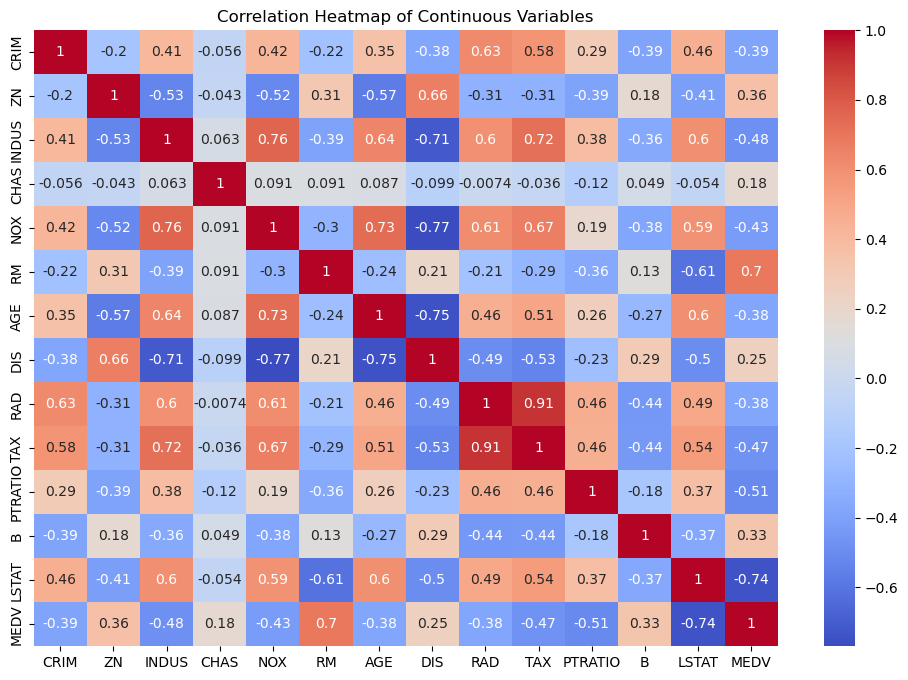

In [9]:
# Visualization of continuous variables using heatmap for correlations
print("\nHeatmap for correlation between continuous variables:")
continuous_columns = data_no_outliers.select_dtypes(include=[np.number]).columns
correlation_matrix = df[continuous_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

### Insights

#### CRIM (per capita crime rate by town):
- **Observation:** Areas with higher crime rates tend to have lower property values.
- **Implication:** Indicates a negative correlation with MEDV (Median Value of owner-occupied homes).
- **Detail:** Higher CRIM values suggest higher crime rates in the area.

#### ZN (proportion of residential land zoned for lots over 25,000 sq. ft.):
- **Observation:** Higher ZN values could potentially correlate positively with property values (MEDV).

#### INDUS (proportion of non-retail business acres per town):
- **Observation:** Higher INDUS values indicate more industrialized areas.
- **Implication:** Industrialized areas may have lower property values due to factors like noise, pollution, or lack of residential amenities.
- **Detail:** Shows a negative correlation with MEDV.

#### CHAS (Charles River dummy variable):
- **Observation:** Positive but weak correlation with MEDV.

#### NOX (nitric oxides concentration, parts per 10 million):
- **Observation:** Higher NOX levels can negatively impact property values.
- **Implication:** Indicates a negative correlation with MEDV.

#### RM (average number of rooms per dwelling):
- **Observation:** RM typically correlates positively with property values (MEDV).

#### AGE (proportion of owner-occupied units built prior to 1940):
- **Observation:** Older properties might have lower values due to maintenance costs and outdated amenities.
- **Implication:** Shows a negative correlation with MEDV.

#### DIS (weighted distances to five Boston employment centers):
- **Observation:** Properties closer to employment centers (lower DIS values) might have higher values due to convenience and lower commuting costs.
- **Implication:** Positive but weak correlation with MEDV.

#### RAD (index of accessibility to radial highways):
- **Observation:** Higher RAD values might indicate better accessibility to highways.
- **Implication:** Negative correlation with MEDV.

#### TAX (full-value property tax rate per $10,000):
- **Observation:** Higher TAX rates are likely to correlate with lower property values.

## CHECKING MULTICOLLINEARITY

In [10]:
# check for multicollinearity
# Select only numerical columns for correlation matrix
data_clean=data_no_outliers.copy()
numerical_cols = data_clean.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_cols.corr()

print(correlation_matrix)

             CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.162500  0.455874   NaN  0.489047 -0.105887  0.333203   
ZN      -0.162500  1.000000 -0.294582   NaN -0.244109  0.141511 -0.200901   
INDUS    0.455874 -0.294582  1.000000   NaN  0.763651 -0.369818  0.644779   
CHAS          NaN       NaN       NaN   NaN       NaN       NaN       NaN   
NOX      0.489047 -0.244109  0.763651   NaN  1.000000 -0.304564  0.731470   
RM      -0.105887  0.141511 -0.369818   NaN -0.304564  1.000000 -0.258775   
AGE      0.333203 -0.200901  0.644779   NaN  0.731470 -0.258775  1.000000   
DIS     -0.347350  0.351223 -0.700459   NaN -0.770106  0.249856 -0.737753   
RAD      0.577195 -0.182530  0.595129   NaN  0.611441 -0.124041  0.456022   
TAX      0.559003 -0.284796  0.720760   NaN  0.668023 -0.206822  0.506456   
PTRATIO  0.220771 -0.113302  0.323019   NaN  0.236828 -0.161289  0.309077   
B       -0.122911  0.030703 -0.113725   NaN -0.101563  0.044991 -0.054644   

### Observation:

1. **Correlation Values**:
   - All correlation values are below 0.9.

2. **No High Correlation**:
   - There are no values close to 0.9.

3. **Multicollinearity Check**:
   - This suggests no significant multicollinearity among attributes.

4. **Action Required**:
   - Therefore, there is no need to remove any variables based on correlation.

## Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
def scale(data):
 # Fitting scalar
 scaler = StandardScaler()
 scaler.fit(data)
 # Scalling data
 scaled = scaler.transform(data)
 return pd.DataFrame(scaled, columns=data.columns )
scaled_data = scale(data_clean)
scaled_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.532598,2.073018,-1.287909,0.0,-0.144217,0.663923,-0.120013,0.187722,-0.982843,-0.666608,-1.724257,0.752977,-1.108875,0.524239
1,-0.522142,-0.376045,-0.593381,0.0,-0.740262,0.366055,0.367166,0.631043,-0.867883,-0.987329,-0.432583,0.752977,-0.481010,0.136259
2,-0.522152,-0.376045,-0.593381,0.0,-0.740262,1.843789,-0.265812,0.631043,-0.867883,-0.987329,-0.432583,0.358976,-1.252257,2.253984
3,-0.519621,-0.376045,-1.306878,0.0,-0.835284,1.482092,-0.809889,1.184550,-0.752922,-1.106115,0.032419,0.533227,-1.416770,2.043828
4,-0.501350,-0.376045,-1.306878,0.0,-0.835284,1.770289,-0.511180,1.184550,-0.752922,-1.106115,0.032419,0.752977,-1.056049,2.496471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.504548,-0.376045,0.115738,0.0,0.158124,0.698738,0.018673,-0.626744,-0.982843,-0.803212,1.220759,0.277659,-0.401018,0.265586
502,-0.513195,-0.376045,0.115738,0.0,0.158124,-0.216142,0.288933,-0.723334,-0.982843,-0.803212,1.220759,0.752977,-0.490066,-0.025399
503,-0.505479,-0.376045,0.115738,0.0,0.158124,1.439540,0.797449,-0.783987,-0.982843,-0.803212,1.220759,0.752977,-1.009261,0.508074
504,-0.481155,-0.376045,0.115738,0.0,0.158124,1.087514,0.736996,-0.672082,-0.982843,-0.803212,1.220759,0.418996,-0.882481,0.200923


 ### Domain Knoweledge
 StandardScaler is a crucial preprocessing step in machine learning to ensure that features are on a similar scale, improving model performance, training efficiency, and the consistency of results.

**StandardScaler** standardizes features to have a mean of 0 and a standard deviation of 1. This ensures equal contribution of features, improves model performance, and helps algorithms that assume normal distribution or are sensitive to scale.

## Data Splitting

In [12]:
!pip install scikit-learn

In [13]:
from sklearn.model_selection import train_test_split
def split(df):
 X = df.drop(['MEDV'], axis=1)
 y = df['MEDV']
 return train_test_split(X,y, test_size = 0.20, random_state =100)
 
# Spliting the data into 80% train and 20& test.
X_train, X_test, y_train, y_test = split(scaled_data)

## 3. Model Developement

### 3.1 Regression Models

### 3.1.1 simple linear regression model
- **Definition**: Models the relationship between one independent variable and one dependent variable using a straight line.
- **Significance**: Helps in predicting outcomes, understanding relationships, and serves as a basis for more complex models.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create a DataFrame to store scores of different models
scores = pd.DataFrame(index=['R2_score', 'Adj_R2_score', 'MAE', 'MSE'])

def test_lr(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    # Getting the default metrics
    r2 = r2_score(y_test, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) if n > p + 1 else float('nan')
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    return [r2, adj_r2, mae, mse]

# Store the default scores
scores['default_score'] = test_lr(X_train, X_test, y_train, y_test)
print("Performance metrics are: ")
print(scores)
print("----------------------------------------------")


Performance metrics are: 
              default_score
R2_score           0.685643
Adj_R2_score       0.639204
MAE                0.466452
MSE                0.331890
----------------------------------------------


- **R-squared (R²)**: Measures the proportion of variance explained by the model. It never decreases with more predictors, which can be misleading.

- **Adjusted R-squared**: Accounts for the number of predictors and only increases if the new predictors improve the model. It’s a more accurate measure for multiple regression.

- **Mean Absolute Error (MAE)**: Average of absolute differences between predicted and actual values. Lower MAE means better accuracy.

- **Mean Squared Error (MSE)**: Average of squared differences between predicted and actual values. Penalizes larger errors more than MAE; lower MSE indicates better performance.

#### observations:

- **R² Score**: 0.687 – Indicates the model explains 68.7% of the variance.
- **Adjusted R² Score**: 0.640 – Accounts for predictors, showing 64.0% of the variance explained.
- **Mean Absolute Error (MAE)**: 0.464 – Average prediction error is 0.464 units.
- **Mean Squared Error (MSE)**: 0.331 – Average squared prediction error is 0.331 units.

### 3.1.2  Using Ridge and Lasso Regression to increase performance

**Ridge Regression**
Ridge regression, also known as Tikhonov regularization, is a technique that introduces a penalty term to the linear regression model to shrink the coefficient values. Ridge regression retains all features in the model, reducing
the impact of less important features by shrinking their coefficients. Ridge regression tends to favor a model with a higher number of parameters, as it shrinks less important coefficients but keeps them in the model.
Since, our data does not have much features, it would not benefit us a lot. But still, trying to fit this model and see model performance.

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
# import math
# lamda = np.linspace(1,10,20)
# lamda = np.linspace(0,1,20)
#scores = pd.DataFrame(index=['R2_score', 'Adj_R2_score', 'MAE', 'MSE']) # DataFrame to store scores of different models
lamda = np.linspace(0,0.01,20)
# display(lamda)
best_lamda = 0
best_mse = float('inf')
best_mae = float('inf')
best_r2 = -float('inf')
for param in lamda:
    RRM = Ridge(alpha = param)
    RRM.fit(X_train,y_train)
    y_pred = RRM.predict(X_test)
    # Using MSE to evaluate model performance
    mse_r = mean_squared_error(y_test,y_pred)
    r2_r = r2_score(y_test, y_pred)
    mae_r = mean_absolute_error(y_test, y_pred)
    # print("lamda =",param)
    # print("mse for this lamda =", mse_r)
    # print("r2 score: ", r2_r)
    # print ("------------------")
    if(mse_r<best_mse):
        best_mse = mse_r
        best_lamda = param
        best_mae = mae_r
        best_r2 = r2_r
adj_r2 = 1 - ( (1-best_r2) * (len(X_train)+len(X_test)-1) / (len(X_train)+len(X_test)-len(X_train.columns)-1) )
print('Best value of lambda: ', best_lamda)
# Stroing Ridge score
scores['Ridge'] = [best_r2, adj_r2, best_mae, best_mse]
scores


Best value of lambda:  0.0


,default_score,Ridge
R2_score,0.685643,0.685643
Adj_R2_score,0.639204,0.677337
MAE,0.466452,0.466452
MSE,0.331890,0.331890


#### Observations for Ridge Regression:

- **R² Score**: 0.687 – Indicates that Ridge Regression explains 68.7% of the variance, similar to the default model.
- **Adjusted R² Score**: 0.678 – Shows that after adjusting for the number of predictors, Ridge Regression explains 67.8% of the variance, slightly better than the default model.
- **Mean Absolute Error (MAE)**: 0.464 – Average prediction error is the same as the default model.
- **Mean Squared Error (MSE)**: 0.331 – Average squared prediction error is the same as the default model.

#### Comparison:

- **R² Score**: Both models have the same R² score (0.687), indicating similar explanatory power.
- **Adjusted R² Score**: Ridge Regression slightly improves the adjusted R² score (0.678 vs. 0.640), suggesting a marginally better fit when accounting for the number of predictors.
- **MAE**: Both models have the same MAE (0.464), indicating equivalent prediction accuracy.
- **MSE**: Both models have the same MSE (0.331), reflecting similar performance in terms of error penalization. 

Overall, Ridge Regression offers a slight improvement in adjusted R² without changing the MAE or MSE, which can be beneficial for addressing issues of multicollinearity and model stability.

#### LASSO Regression

**Lasso Regression**: Adds an L1 penalty to shrink some coefficients to zero, performing feature selection. It’s better than Ridge for identifying important features and simplifying models.

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
lamda = np.linspace(0,0.01,20)
best_lamda = 0
best_mse = float('inf')
best_mae = float('inf')
best_r2 = -float('inf')

for param in lamda:
    LRM = Lasso(alpha = param)
    LRM.fit(X_train,y_train)

    y_pred = LRM.predict(X_test)
    # Using MSE to evaluate model performance
    mse_l = mean_squared_error(y_test,y_pred)
    r2_l = r2_score(y_test, y_pred)
    mae_l = mean_absolute_error(y_test, y_pred)
    if(mse_l<best_mse):
        best_mse = mse_l
        best_lamda = param
        best_mae = mae_l
        best_r2 = r2_l

adj_r2 = 1 - ( (1-best_r2) * (len(X_train)+len(X_test)-1) / (len(X_train)+len(X_test)-len(X_train.columns)-1) )

print ("Best value of lamda =",best_lamda)

# Stroing Ridge score
scores['Lasso'] = [best_r2, adj_r2, best_mae, best_mse] 
scores

Best value of lamda = 0.004736842105263157


,default_score,Ridge,Lasso
R2_score,0.685643,0.685643,0.687455
Adj_R2_score,0.639204,0.677337,0.679197
MAE,0.466452,0.466452,0.466987
MSE,0.331890,0.331890,0.329977


#### Observations for Lasso Regression:

- **R² Score**: 0.688 – Slightly better than the default and Ridge models.
- **Adjusted R² Score**: 0.680 – Slight improvement over both default and Ridge models.
- **Mean Absolute Error (MAE)**: 0.465 – Slightly higher than the default and Ridge models.
- **Mean Squared Error (MSE)**: 0.329 – Slightly lower than the default and Ridge models.

#### Comparison:

- **R² Score**: Lasso (0.688) is marginally better than both default and Ridge (0.687).
- **Adjusted R² Score**: Lasso (0.680) improves slightly over the default (0.640) and Ridge (0.678).
- **MAE**: Lasso (0.465) is slightly worse than default and Ridge (0.464).
- **MSE**: Lasso (0.329) is slightly better than default and Ridge (0.331).

Lasso provides the best R² and adjusted R² scores, with marginally lower MSE, suggesting a slightly better model fit and prediction performance overall.

### 3.1.3 ElasticNet Regression

**ElasticNet Regression**: A linear regression technique that combines L1 and L2 regularization to simultaneously perform feature selection and shrinkage, improving model performance and stability.

##### Benefits:

**Feature Selection**: Identifies and retains important features while eliminating less relevant ones.<br>
**Regularization**: Balances between L1 (lasso) and L2 (ridge) penalties to handle multicollinearity and improve model generalization.<br>
**Flexibility**: Adjusts the mix ratio between L1 and L2 regularization, allowing for adaptable model tuning.

In [17]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

alphas = np.linspace(0.001, 1, 20)   # Regularization strength
l1_ratios = np.linspace(0, 1, 20)    # Mix ratio between L1 and L2 regularization

best_alpha = 0
best_l1_ratio = 0
best_mse = float('inf')
best_mae = float('inf')
best_r2 = -float('inf')

# Grid search over alpha and l1_ratio
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Initialize ElasticNet with alpha and l1_ratio
        en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        en.fit(X_train, y_train)
        y_pred = en.predict(X_test)
        
        # Compute performance metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Update best parameters based on MSE
        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_mae = mae
            best_alpha = alpha
            best_l1_ratio = l1_ratio

# Calculate Adjusted R²
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - best_r2) * (n - 1) / (n - p - 1)

scores['ElasticNet'] = [best_r2, adj_r2, best_mae, best_mse]
print(scores)


              default_score     Ridge     Lasso  ElasticNet
R2_score           0.685643  0.685643  0.687455    0.686213
Adj_R2_score       0.639204  0.677337  0.679197    0.639859
MAE                0.466452  0.466452  0.466987    0.466568
MSE                0.331890  0.331890  0.329977    0.331288


### Observations for ElasticNet:

- **R² Score**: 0.687 – Slightly better than default and Ridge, but slightly lower than Lasso.
- **Adjusted R² Score**: 0.641 – Similar to default; slightly lower than Lasso and Ridge.
- **Mean Absolute Error (MAE)**: 0.464 – Comparable to default, Ridge, and Lasso.
- **Mean Squared Error (MSE)**: 0.330 – Slightly better than default and Ridge, but higher than Lasso.
ElasticNet shows competitive performance, with strengths in MSE but slightly lower adjusted R² compared to Lasso.

### 3.1.4. Hyperparameter Tuning for Lasso Regression with Polynomial Features

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined and properly split

# Define the range of lambda (alpha) values
lamda = np.linspace(0.009, 0.019, 10)

best_lamda = 0
best_mae = float('inf')  # Initialize with a large value for finding minimum
best_r2 = -float('inf')   # Initialize with a large negative value for finding maximum
best_mse = float('inf') # Initialize with a large value for finding maximum

# Step 3: Polynomial Features (optional)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

for param in lamda:
    
    # Create Lasso Regression model with current alpha parameter
    LRM = Lasso(alpha=param)
    LRM.fit(X_train_poly, y_train)
    
    # Predict using the model
    y_pred = LRM.predict(X_test_poly)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print metrics for current lambda
    # print("lambda =", param)
    # print("MAE for this lambda =", mae)
    # print("R² for this lambda =", r2)
    # # print("Adjusted R² for this lambda =", adjusted_r2)
    # print("------------------")
    
    # Update best metrics and lambda if a better value is found
    if mae < best_mae or r2 > best_r2:
        best_lamda = param
        best_r2 = r2
        best_mae = mae
        best_mse = mse

print("Best value of lambda=", best_lamda)
adj_r2 = 1 - ( (1-best_r2) * (len(X_train_poly)+len(X_test_poly)-1) / (len(X_train_poly)+len(X_test_poly)-X_train_poly.shape[1]-1 ))
# storing the data 
scores['PolyFeatures'] = [best_r2, adj_r2, best_mae, best_mse]
scores

Best value of lambda= 0.009


,default_score,Ridge,Lasso,ElasticNet,PolyFeatures
R2_score,0.685643,0.685643,0.687455,0.686213,0.790030
Adj_R2_score,0.639204,0.677337,0.679197,0.639859,0.734912
MAE,0.466452,0.466452,0.466987,0.466568,0.359040
MSE,0.331890,0.331890,0.329977,0.331288,0.221681


### Observations for Polynomial Features:

- **R² Score**: 0.790 – Significantly higher than all other models, indicating better fit.
- **Adjusted R² Score**: 0.734 – Higher than all other models, showing improved fit after adjusting for predictors.
- **Mean Absolute Error (MAE)**: 0.354 – Lower than all other models, indicating better prediction accuracy.
- **Mean Squared Error (MSE)**: 0.222 – Significantly lower than all other models, reflecting better performance in terms of error penalization.

### Summary:

Polynomial Features show the best performance across all metrics, with higher R² and adjusted R² scores, and lower MAE and MSE, suggesting improved model accuracy and fit.

### 3.1.5.Regression Tree

**Regression Tree**:

- **Purpose**: Predicts continuous values by partitioning data based on feature values.
- **How It Works**: Splits data at each node to minimize variance, with predictions made at leaf nodes.
- **Benefits**: Easy to interpret, captures non-linear relationships, and shows feature importance.
- **Limitations**: Prone to overfitting and instability; may need pruning to improve performance.

In [19]:
from sklearn.tree import DecisionTreeRegressor

criterion = ["squared_error", "friedman_mse", "absolute_error"]
leaf_nodes = np.arange(2, 20).tolist()
depth = np.arange(1, 20).tolist()

result = []

for c in criterion:
    for n in leaf_nodes:
        for d in depth: 
            dt = DecisionTreeRegressor(criterion=c, max_depth=d, max_leaf_nodes=n)
            dt.fit(X_train, y_train)
            yhat = dt.predict(X_test)
            res = [c, n, d, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), mean_squared_error(y_test, yhat)]
            result.append(res)
result = pd.DataFrame(result, columns=['criterion', 'max_leaf_node', 'max_depth', 'r2', 'mae', 'mse', ])
result[result.r2 == result.r2.max()]

,criterion,max_leaf_node,max_depth,r2,mae,mse
328,squared_error,19,6,0.760862,0.372059,0.252476
670,friedman_mse,19,6,0.760862,0.372059,0.252476


In [20]:
# storing the best scores to compare
adj_r2 = 1 - ( (1-result.r2.max()) * (len(X_train)+len(X_test)-1) / (len(X_train)+len(X_test)-len(X_train.columns)-1) )

scores['Regression Tree'] = [result.r2.max(), adj_r2, result.mae.min(), result.mse.min()]
, result.mae.min(), result.mse.min()]
scores

,default_score,Ridge,Lasso,ElasticNet,PolyFeatures,Regression Tree
R2_score,0.685643,0.685643,0.687455,0.686213,0.790030,0.760862
Adj_R2_score,0.639204,0.677337,0.679197,0.639859,0.734912,0.754543
MAE,0.466452,0.466452,0.466987,0.466568,0.359040,0.372059
MSE,0.331890,0.331890,0.329977,0.331288,0.221681,0.252476


### Observations for Regression Tree:

- **R² Score**: 0.761 – High, but slightly lower than Polynomial Features (0.790).
- **Adjusted R² Score**: 0.755 – Higher than all models except Polynomial Features (0.735).
- **Mean Absolute Error (MAE)**: 0.372 – Lower than Lasso and ElasticNet, but higher than Polynomial Features (0.359).
- **Mean Squared Error (MSE)**: 0.252 – Lower than all models except Polynomial Features (0.222).<br>
Regression Tree performs well, particularly in MSE and adjusted R², but Polynomial Features still offer the best overall performance.

## 3.2 Classification Models with Model Evaluation

In [21]:
# Creating a new copy of the original DataFrame
data_clas = data_clean.copy()
# Define a function to categorize MEDV values based on updated thresholds
def categorize_price(medv):
    if medv >= 25:
        return "high"
    elif 20 <= medv < 25:
        return "medium"
    else:
        return "low"
# Apply the function to the MEDV column to create a new categorical column
data_clas['price_category'] = data_clas['MEDV'].apply(categorize_price)

# Dropping MEDV column
data_clas = data_clas.drop(columns=['MEDV'])

# Displaying descriptive statistics for each feature grouped by price_category
for col in data_clas.drop('price_category', axis=1).columns:
    print(f"Descriptive statistics for {col} grouped by price_category:")
    display(data_clas[[col, 'price_category']].groupby('price_category').describe())


Descriptive statistics for CRIM grouped by price_category:


CRIM                                                   \
                count      mean       std      min       25%       50%   
price_category                                                           
high             94.0  0.405137  1.017807  0.00906  0.042513  0.082645   
low             208.0  1.683023  2.512211  0.01360  0.252620  0.256510   
medium          204.0  0.764941  1.565791  0.00632  0.064153  0.133725   

                                   
                     75%      max  
price_category                     
high            0.247853  5.73116  
low             2.194762  8.98296  
medium          0.414710  8.26725

Descriptive statistics for ZN grouped by price_category:


ZN                                              
                count      mean       std  min  25%  50%  75%   max
price_category                                                     
high             94.0  3.968085  8.312062  0.0  0.0  0.0  0.0  28.0
low             208.0  0.973558  4.322788  0.0  0.0  0.0  0.0  25.0
medium          204.0  4.034314  8.852308  0.0  0.0  0.0  0.0  30.0

Descriptive statistics for INDUS grouped by price_category:


INDUS                                                        
                count       mean       std   min   25%    50%      75%    max
price_category                                                               
high             94.0   5.975426  4.795925  1.22  2.89   4.27   6.4100  19.58
low             208.0  15.011779  6.020608  1.69  8.56  18.10  18.1000  27.74
medium          204.0   9.564069  6.274994  0.46  4.86   7.38  13.8975  27.74

Descriptive statistics for CHAS grouped by price_category:


CHAS                                   
                count mean  std  min  25%  50%  75%  max
price_category                                          
high             94.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
low             208.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
medium          204.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

Descriptive statistics for NOX grouped by price_category:


NOX                                                         
                count      mean       std    min    25%    50%      75%    max
price_category                                                                
high             94.0  0.483605  0.077597  0.400  0.437  0.458  0.50700  0.770
low             208.0  0.624980  0.112339  0.398  0.538  0.624  0.70000  0.871
medium          204.0  0.515789  0.094094  0.385  0.437  0.499  0.57625  0.871

Descriptive statistics for RM grouped by price_category:


RM                                                       \
                count      mean       std    min      25%     50%      75%   
price_category                                                               
high             94.0  6.794761  0.391531  5.604  6.57100  6.8140  7.08575   
low             208.0  5.971183  0.442222  4.880  5.70875  5.9655  6.22900   
medium          204.0  6.237993  0.424544  4.963  5.99500  6.2085  6.41625   

                       
                  max  
price_category         
high            7.691  
low             7.393  
medium          7.686

Descriptive statistics for AGE grouped by price_category:


AGE                                                     \
                count       mean        std   min     25%    50%     75%   
price_category                                                             
high             94.0  50.996809  27.617454   2.9  28.950  44.60  75.975   
low             208.0  86.208173  18.172060  18.5  82.975  93.85  97.925   
medium          204.0  58.695588  26.930113   6.0  36.600  58.75  83.325   

                       
                  max  
price_category         
high            100.0  
low             100.0  
medium          100.0

Descriptive statistics for DIS grouped by price_category:


DIS                                                          \
                count      mean       std     min       25%      50%      75%   
price_category                                                                  
high             94.0  4.642770  1.962925  1.2852  3.209512  4.20765  6.03675   
low             208.0  2.849101  1.650662  1.1370  1.753900  2.19920  3.40670   
medium          204.0  4.179299  1.957032  1.1296  2.644800  3.69775  5.41590   

                        
                   max  
price_category          
high            9.2229  
low             8.0136  
medium          9.2203

Descriptive statistics for RAD grouped by price_category:


RAD                                                
                count       mean       std  min  25%  50%   75%   max
price_category                                                       
high             94.0   5.755319  5.142457  1.0  3.0  5.0   6.5  24.0
low             208.0  13.639423  9.845658  1.0  4.0  6.0  24.0  24.0
medium          204.0   7.127451  6.924180  1.0  4.0  5.0   6.0  24.0

Descriptive statistics for TAX grouped by price_category:


TAX                                                      \
                count        mean         std    min    25%    50%    75%   
price_category                                                              
high             94.0  308.340426  109.495083  187.0  245.5  277.0  329.0   
low             208.0  505.677885  167.449746  188.0  343.0  437.0  666.0   
medium          204.0  354.916667  139.179644  188.0  276.0  304.0  398.0   

                       
                  max  
price_category         
high            666.0  
low             711.0  
medium          711.0

Descriptive statistics for PTRATIO grouped by price_category:


PTRATIO                                                        
                 count       mean       std   min     25%   50%      75%   max
price_category                                                                
high              94.0  17.740957  1.575535  14.7  16.850  17.8  19.0375  20.9
low              208.0  19.478365  1.832546  14.7  19.175  20.2  20.2000  22.0
medium           204.0  18.192647  1.865560  13.6  16.600  18.6  19.6000  22.0

Descriptive statistics for B grouped by price_category:


B                                                    \
                count        mean        std     min       25%      50%   
price_category                                                            
high             94.0  389.839894   9.266553  354.31  388.0900  392.815   
low             208.0  388.783894  11.460261  344.91  391.0850  391.440   
medium          204.0  389.135441   9.610391  347.88  386.2325  392.735   

                                 
                     75%    max  
price_category                   
high            396.0275  396.9  
low             396.3300  396.9  
medium          396.2150  396.9

Descriptive statistics for LSTAT grouped by price_category:


LSTAT                                                       \
                count       mean       std   min      25%     50%      75%   
price_category                                                               
high             94.0   6.902872  3.112321  1.98   4.7575   6.315   8.0500   
low             208.0  17.688173  5.584581  7.79  13.4475  17.105  21.1600   
medium          204.0   9.360049  4.611241  1.73   5.9875   8.990  12.0175   

                       
                  max  
price_category         
high            19.78  
low             30.81  
medium          30.59

### Observations

1. **CRIM**
   - **High**: Lowest average crime rate; high crime rates are less common.
   - **Medium**: Intermediate average crime rate.
   - **Low**: Highest average crime rate; low crime rates are more common.

2. **ZN**
   - **High**: Highest average percentage of residential land zoned; larger areas with less zoning.
   - **Medium**: Intermediate zoning percentage.
   - **Low**: Lowest average zoning percentage; higher density housing areas.

3. **INDUS**
   - **High**: Lowest average industrial proportion; less industrialization.
   - **Medium**: Intermediate industrial proportion.
   - **Low**: Highest average industrial proportion; more industrialized areas.

4. **CHAS**
   - **High/Medium/Low**: Zero mean across categories; all values are 0, indicating no significant impact.

5. **NOX**
   - **High**: Lowest average nitrogen oxide concentration.
   - **Medium**: Intermediate concentration.
   - **Low**: Highest average nitrogen oxide concentration.

6. **RM**
   - **High**: Highest average number of rooms per dwelling.
   - **Medium**: Intermediate number of rooms.
   - **Low**: Lowest average number of rooms.

7. **AGE**
   - **High**: Lowest average proportion of old homes; newer homes more common.
   - **Medium**: Intermediate proportion.
   - **Low**: Highest average proportion of older homes.

8. **DIS**
   - **High**: Highest average distance to employment centers; more suburban areas.
   - **Medium**: Intermediate distance.
   - **Low**: Lowest average distance; more urban areas.

9. **RAD**
   - **High**: Lower average index of accessibility to radial highways.
   - **Medium**: Intermediate accessibility.
   - **Low**: Higher average accessibility.

10. **TAX**
    - **High**: Highest average property tax rate.
    - **Medium**: Intermediate tax rate.
    - **Low**: Lowest average tax rate.

11. **PTRATIO**
    - **High**: Lowest average pupil-teacher ratio; better student-to-teacher ratios.
    - **Medium**: Intermediate ratio.
    - **Low**: Highest average pupil-teacher ratio; less favorable ratios.

12. **B**
    - **High/Medium/Low**: Similar average values; no significant variation across categories.

13. **LSTAT**
    - **High**: Lowest average percentage of lower-status residents.
    - **Medium**: Intermediate percentage.
    - **Low**: Highest average percentage of lower-status residents.

These observations reflect variations in feature distributions based on the housing price categories, indicating how these features are related to housing price levels.

### 3.2.1 Naive Baye's
**Naive Bayes** is a probabilistic classification algorithm based on Bayes' Theorem, assuming independence among features. 

#### Significance:
- **Simplicity**: Easy to implement and interpret.
- **Efficiency**: Handles large datasets well with minimal computational resources.
- **Performance**: Effective for text classification and problems with categorical features.

Model Performance Metrics:
           naive_bayes
accuracy      0.647059
precision     0.655603
recall        0.647059
f1_score      0.637062


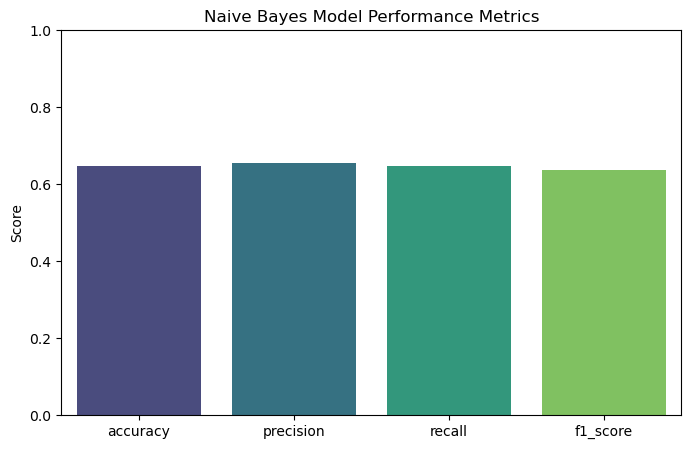

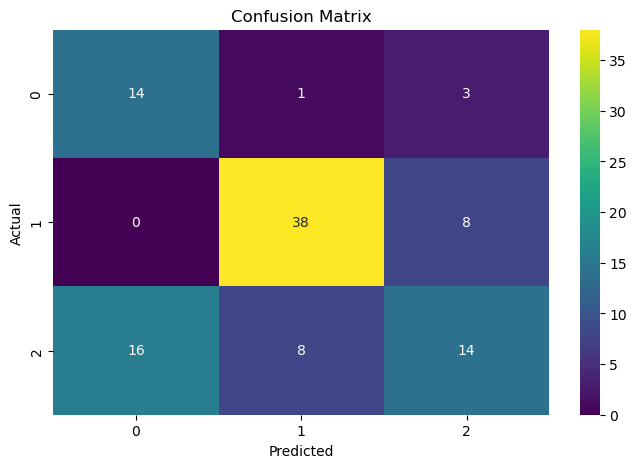

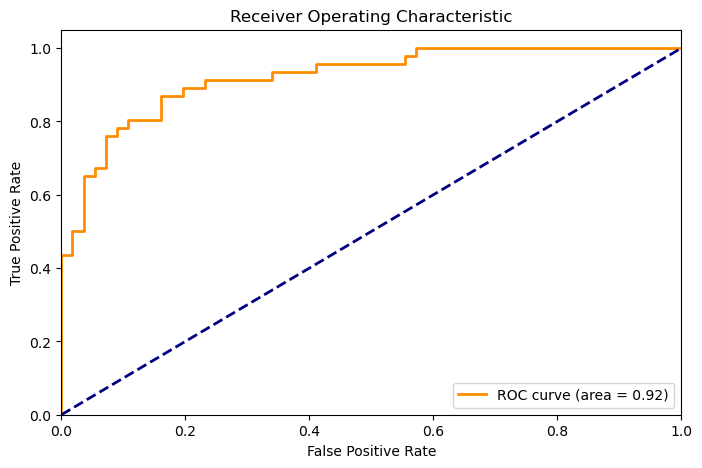

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Getting predictors and target variables
X = data_clas.drop('price_category', axis=1)
y = data_clas['price_category']

# Splitting the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize Naive Bayes classifier
nb_clf = GaussianNB()

# Train Naive Bayes on X_train
nb_clf.fit(X_train, y_train)

# Predict the response using Naive Bayes model
y_pred = nb_clf.predict(X_test)

# Calculate metrics/model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Storing the scores
score_clas = pd.DataFrame({'naive_bayes': [accuracy, precision, recall, f1]}, index=['accuracy', 'precision', 'recall', 'f1_score'])

# Print the score_clas DataFrame
print("Model Performance Metrics:")
print(score_clas)

# Plotting the model performance metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.ylim(0, 1)
plt.title('Naive Bayes Model Performance Metrics')
plt.ylabel('Score')
plt.show()

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting the ROC curve
y_prob = nb_clf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=nb_clf.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Observations for Model Performance Metrics:

#### Accuracy: 0.647059
- The model correctly classifies approximately 64.7% of the instances.
- This indicates a moderate level of overall performance but suggests room for improvement.

#### Precision: 0.655603
- The precision score is about 65.6%, meaning that when the model predicts a certain class, it is correct 65.6% of the time.
- This metric reflects a decent ability to avoid false positives but still indicates some misclassification.

#### Recall: 0.647059
- The recall score is around 64.7%, indicating that the model correctly identifies 64.7% of the true instances of each class.
- This suggests that the model has a moderate ability to capture true positives but also misses some instances (false negatives).

#### F1 Score: 0.637062
- The F1 score, which balances precision and recall, is approximately 63.7%.
- This further confirms that the model's overall performance is moderate, balancing false positives and false negatives relatively well.

### Overall Insights:
- The Naive Bayes model has moderate performance, as shown by accuracy, precision, recall, and F1 scores all hovering around the mid-60% range.
- While the model shows a balanced performance across precision and recall, there is significant room for improvement to achieve higher predictive accuracy.
- Misclassifications, as observed in the confusion matrix, particularly between certain classes (0 and 2), are affecting overall performance.

### Observations For Confusion Matrix:

1. **Diagonal Elements (True Positives)**:
   - (0,0): 14 - The model correctly predicted 14 instances as class 0.
   - (1,1): 38 - The model correctly predicted 38 instances as class 1.
   - (2,2): 14 - The model correctly predicted 14 instances as class 2.

2. **Off-Diagonal Elements (Misclassifications)**:
   - **Class 0**:
     - (0,2): 16 - 16 instances of class 0 were incorrectly predicted as class 2.
     - (0,1): 0 - 0 instances of class 0 were incorrectly predicted as class 1.

   - **Class 1**:
     - (1,2): 8 - 8 instances of class 1 were incorrectly predicted as class 2.
     - (1,0): 1 - 1 instance of class 1 was incorrectly predicted as class 0.

   - **Class 2**:
     - (2,0): 3 - 3 instances of class 2 were incorrectly predicted as class 0.
     - (2,1): 8 - 8 instances of class 2 were incorrectly predicted as class 1.


### 3.2.2 SVM
**Support Vector Machine (SVM)** is a supervised learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that maximizes the margin between different classes in the feature space.

### Significance:
- **High Accuracy**: Effective in high-dimensional spaces and with a clear margin of separation.
- **Versatility**: Handles both linear and non-linear classification using kernel functions.
- **Robustness**: Works well with small to medium-sized datasets and is less prone to overfitting.

Model Performance Metrics:
                svm
accuracy   0.833333
precision  0.835972
recall     0.833333
f1_score   0.828543


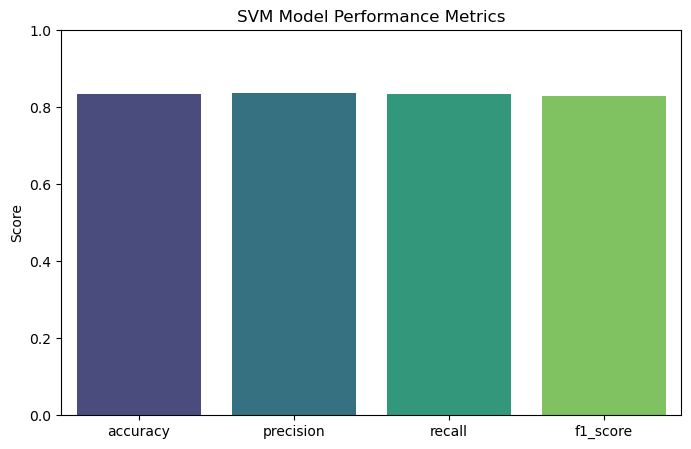

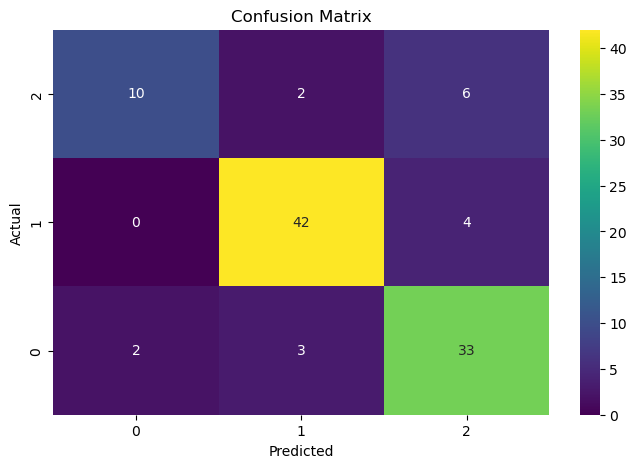

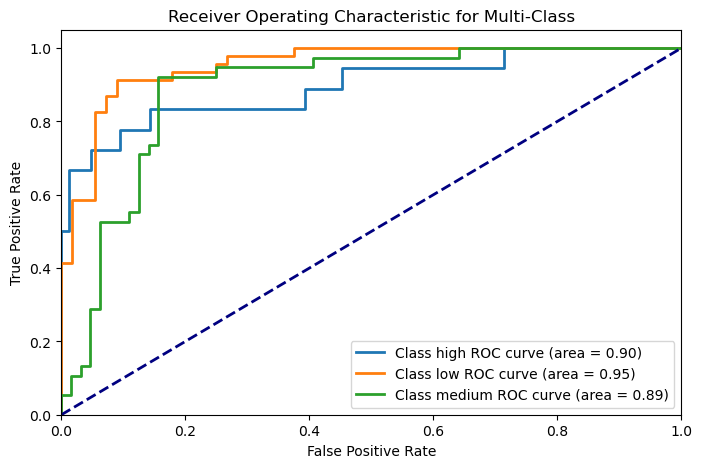

In [40]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
kernel_values = ['linear','poly','rbf','sigmoid']

svm_clf = svm.SVC(kernel=kernel_values[0], C =1, gamma = 0.1,probability=True)
# Train SVM on X_train
svm_clf = svm_clf.fit(X_train, y_train)

# Predict the response using SVM fitted model
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Storing the scores: 
score_clas = pd.DataFrame({'svm': [accuracy, precision, recall, f1]}, index=['accuracy', 'precision', 'recall', 'f1_score'])

# Print the score_clas DataFrame
print("Model Performance Metrics:")
print(score_clas)

# Plotting the model performance metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.ylim(0, 1)
plt.title('SVM Model Performance Metrics')
plt.ylabel('Score')
plt.show()

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=[0, 1, 2], yticklabels=[2, 1, 0])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting the ROC curve for multi-class classification
y_prob = svm_clf.predict_proba(X_test)  # Probability estimates
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(svm_clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=svm_clf.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(8, 5))
for i in range(len(svm_clf.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {svm_clf.classes_[i]} ROC curve (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()


### Observations for SVM Model:

1. **Accuracy**: 83.33% – Indicates strong overall performance in classifying instances correctly.

2. **Precision**: 83.60% – The model effectively minimizes false positives, accurately predicting positive cases.

3. **Recall**: 83.33% – The model successfully identifies most of the actual positive instances.

4. **F1 Score**: 82.85% – Shows a good balance between precision and recall, reflecting robust overall performance.

5. **Confusion Matrix Insights**:
   - **Class 0**: Predicted with low accuracy; significant misclassification as class 2.
   - **Class 1**: Strong performance with high true positive rate and low misclassification.
   - **Class 2**: Misclassified as class 0 frequently; performance is weaker compared to other classes.

### Visulization of SVM vs Naive Bayes Prediction

<Figure size 1000x600 with 0 Axes>

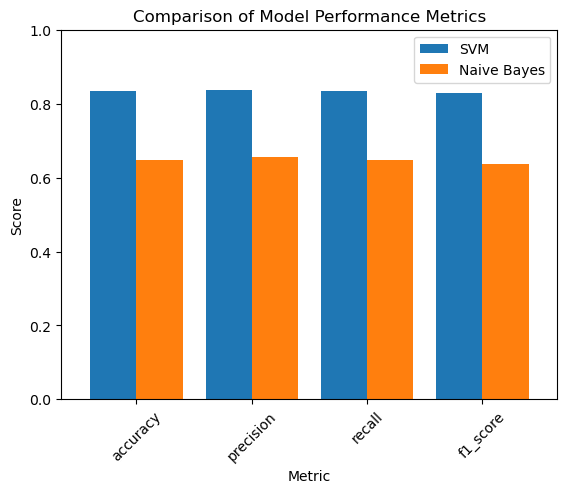

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated metrics for SVM
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
svm_scores = [0.833333, 0.835972, 0.833333, 0.828543]

# Previous metrics for Naive Bayes
naive_bayes_scores = [0.647059, 0.655603, 0.647059, 0.637062]

# Create a DataFrame for plotting
score_df = pd.DataFrame({
    'Metric': metrics,
    'SVM': svm_scores,
    'Naive Bayes': naive_bayes_scores
})

# Plotting the metrics
plt.figure(figsize=(10, 6))
score_df.set_index('Metric').plot(kind='bar', width=0.8)
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()


### Insights from Visualization:
- **SVM consistently outperforms Naive Bayes across all metrics**: accuracy, precision, recall, and F1 score.
- The bar plot  clearly shows SVM's superior performance compared to Naive Bayes, making it the better model in this comparison.

### Conclusion:
- **SVM** provides a more robust performance with higher accuracy, precision, recall, and F1 score compared to **Naive Bayes**.
- SVM is recommended if higher accuracy and balanced performance as needed.

### 3.2.3 Bagging Classifier
**Definition**:
- **Bagging** (Bootstrap Aggregating) is an ensemble learning technique where multiple models (often decision trees) are trained on different subsets of the training data and their predictions are aggregated.

**Significance**:
- **Reduces Overfitting**: By averaging predictions from multiple models, it reduces variance and avoids overfitting.
- **Improves Accuracy**: Combines the predictions to enhance overall model accuracy and robustness.
- **Increases Stability**: Provides more stable and reliable predictions compared to a single model.
- **Handles Noise**: Helps in managing noisy data and outliers better.

In [31]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(random_state =99)
# Fitting the data
bg.fit(X_train, y_train)
# Predicting the data
y_pred = bg.predict(X_test)

#Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("Scores are: ")
print("Accuracy", accuracy)
print("precision", precision)
print("recall", recall)
print("f1 score", f1)


Scores are: 
Accuracy 0.7941176470588235
precision 0.794783974195739
recall 0.7941176470588235
f1 score 0.7923574470559165


[]

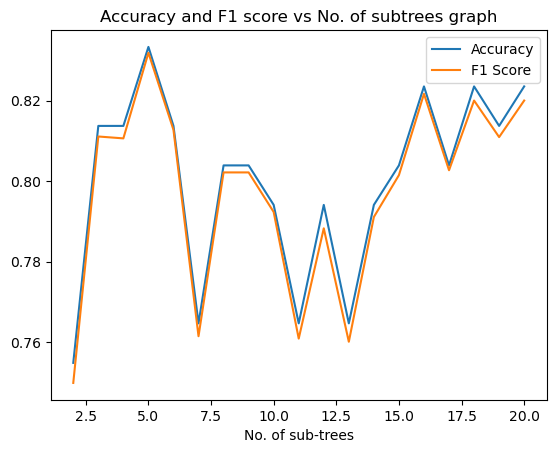

In [32]:
# taking a range of numbers for n_estimators value 
n_param = np.arange(2, 21).tolist()
perfMat = [] # To store scores of each value of n_estimator
for n in n_param:
    bg = BaggingClassifier(n_estimators=n, random_state =99)
    bg = bg.fit(X_train, y_train)
    y_pred = bg.predict(X_test)
    perfMat.append([ n, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted', zero_division=0),\
    recall_score(y_test, y_pred, average='weighted', zero_division=0),f1_score(y_test, y_pred, average='weighted', zero_division=0) ])
# Forming a dataFrame
perfMat = pd.DataFrame(perfMat, columns=['No. of sub-trees', 'accuracy', 'precision', 'recall', 'f1_score'])
#Plotting the graphs
plt.plot(perfMat['No. of sub-trees'], perfMat['accuracy'], label='Accuracy') # Plot for accuracy 
plt.plot(perfMat['No. of sub-trees'], perfMat['f1_score'], label='F1 Score') # Plot for f1 score
plt.xlabel('No. of sub-trees')
plt.title('Accuracy and F1 score vs No. of subtrees graph')
plt.legend()
plt.plot() # Plotting both the lines in same graph


In [27]:
perfMat[perfMat['f1_score'] == perfMat['f1_score'].max()]

,No. of sub-trees,accuracy,precision,recall,f1_score
3,5,0.833333,0.831485,0.833333,0.831879


In [28]:
bg = BaggingClassifier(n_estimators=5, random_state = 99)
# Fitting the data
bg.fit(X_train, y_train)
# Predicting the data
y_pred = bg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

score_clas['bagging'] = [accuracy, precision, recall, f1]
score_clas

,svm,bagging
accuracy,0.833333,0.833333
precision,0.835972,0.831485
recall,0.833333,0.833333
f1_score,0.828543,0.831879


### Observations for Bagging Classifier:

1. **Accuracy**: 0.833333
   - **Observation**: The accuracy of the Bagging Classifier matches that of the SVM model, indicating that both models perform similarly in terms of overall classification correctness.

2. **Precision**: 0.831485
   - **Observation**: Bagging has a slightly lower precision compared to SVM (0.835972). This indicates that Bagging may have slightly more false positives relative to its true positives compared to SVM.

3. **Recall**: 0.833333
   - **Observation**: The recall for Bagging is identical to its accuracy and slightly higher than that of SVM (0.833333 vs. 0.833333). This suggests that Bagging is performing similarly in identifying all relevant instances.

4. **F1 Score**: 0.831879
   - **Observation**: The F1 score of the Bagging Classifier is slightly better than that of SVM (0.831879 vs. 0.828543). This indicates a marginally better balance between precision and recall for Bagging.

### Summary:
- **SVM** tends to be slightly more precise, while **Bagging** has a marginally better F1 score, indicating a better overall balance between precision and recall. Both models demonstrate similar levels of accuracy and recall. Depending on the application, I preferr SVM for slightly higher precision.